# Seatle airbnb

Context

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.
Content

The following Airbnb activity is included in this Seattle dataset:

    Listings, including full descriptions and average review score
    Reviews, including unique id for each reviewer and detailed comments
    Calendar, including listing id and the price and availability for that day

Inspiration

    Can you describe the vibe of each Seattle neighborhood using listing descriptions?
    What are the busiest times of the year to visit Seattle? By how much do prices spike?
    Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?


# Library and data

In [284]:
import pandas as pd
import datetime
import numpy as np
#import pathlib

In [296]:
calendar_seattle = pd.read_csv("../data/seattle/calendar.csv")
listings_seattle = pd.read_csv("../data/seattle/listings.csv")
reviews_seattle = pd.read_csv("../data/seattle/reviews.csv")

In [297]:
# https://www.kaggle.com/airbnb/seattle/data

In [298]:
calendar_seattle.shape, listings_seattle.shape, reviews_seattle.shape

((1393570, 4), (3818, 92), (84849, 6))

## 1) how much AirBNB homes are earning in certain time frames and areas?

In [299]:
calendar_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [300]:
calendar_seattle.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [301]:
calendar_seattle.isnull().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

Since I am interested in agregating and analyzing prices, I will drop all 30% of the rows with NaN.

In [302]:
calendar_seattle_dropped_na = calendar_seattle.dropna(subset=["price"])
calendar_seattle_dropped_na.shape

(934542, 4)

Convert date column into a datetime datatype.
Create year and month columns for grouping together with cleaning price columns since it contains characters, i.e. parse only numbers.

In [303]:
calendar_seattle_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
listing_id    934542 non-null int64
date          934542 non-null object
available     934542 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 35.6+ MB


In [304]:
calendar_seattle_dropped_na['date'] = pd.to_datetime(calendar_seattle_dropped_na['date'])

calendar_seattle_dropped_na = (calendar_seattle_dropped_na
    .assign(
        year = calendar_seattle_dropped_na["date"].dt.year,
        month = calendar_seattle_dropped_na["date"].dt.month,
        price = calendar_seattle_dropped_na["price"].str.extract('(\d+)').astype(int)
        )
    )
calendar_seattle_dropped_na.head()

,listing_id,date,available,price,year,month
0,241032,2016-01-04,t,85,2016,1
1,241032,2016-01-05,t,85,2016,1
9,241032,2016-01-13,t,85,2016,1
10,241032,2016-01-14,t,85,2016,1
14,241032,2016-01-18,t,85,2016,1


In [305]:
calendar_seattle_dropped_na.describe()

,listing_id,price,year,month
count,9.345420e+05,934542.000000,934542.000000,934542.000000
mean,5.305517e+06,137.090652,2016.006097,6.661120
std,2.974821e+06,101.274170,0.077846,3.446401
min,3.335000e+03,1.000000,2016.000000,1.000000
25%,2.875975e+06,75.000000,2016.000000,4.000000
50%,5.615620e+06,109.000000,2016.000000,7.000000
75%,7.873345e+06,160.000000,2016.000000,10.000000
max,1.034016e+07,999.000000,2017.000000,12.000000


C:\appl\Miniconda3\envs\minimal_ds\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\appl\Miniconda3\envs\minimal_ds\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\appl\Miniconda3\envs\minimal_ds\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\appl\Miniconda3\envs\mini

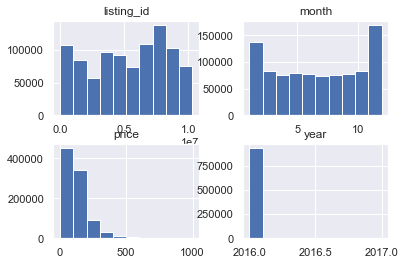

In [306]:
calendar_seattle_dropped_na.hist();

Group by listing_id, year and month, and extract mean price.

In [308]:
calendar_seattle_grouped = (calendar_seattle_dropped_na
    .groupby(["listing_id", "year", "month"])
    .agg(price_year_month_mean = pd.NamedAgg(column="price", aggfunc="mean")).astype("int")
    .reset_index()
    )
calendar_seattle_grouped

,listing_id,year,month,price_year_month_mean
0,3335,2016,2,120
1,3335,2016,3,120
2,3335,2016,4,120
3,3335,2016,5,120
4,3335,2016,6,120
...,...,...,...,...
36110,10340165,2016,9,43
36111,10340165,2016,10,43
36112,10340165,2016,11,43
36113,10340165,2016,12,43


In [57]:
listings_seattle.isnull().mean()[listings_seattle.isnull().mean() != 0].sort_values(ascending=False)

license                        1.000000
square_feet                    0.974594
monthly_price                  0.602672
security_deposit               0.511262
weekly_price                   0.473808
notes                          0.420639
neighborhood_overview          0.270299
cleaning_fee                   0.269775
transit                        0.244631
host_about                     0.224987
host_acceptance_rate           0.202462
review_scores_accuracy         0.172342
review_scores_checkin          0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
reviews_per_month              0.164222
first_review                   0.164222
last_review                    0.164222
space                          0.149031
host_response_time             0.136983
host_response_rate             0.136983
neighbourhood                  0.108958


Remove one \n value from zip code.

In [200]:
# error
listings_seattle.loc[859,"zipcode"]

'99\n98122'

In [201]:
listings_seattle = listings_seattle.assign(zipcode = pd.to_numeric(listings_seattle["zipcode"], errors='coerce'))

In [202]:
len(listings_seattle["zipcode"].unique())

28

In [203]:
len(listings_seattle["neighbourhood"].unique())

82

In [135]:
listings_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [221]:
listings_seattle.shape, calendar_seattle_grouped.shape

((3818, 92), (36115, 4))

In [217]:
calendar_seattle_grouped["listing_id"].duplicated().sum()

32392

In [309]:
calendar_listings_joined = calendar_seattle_grouped.merge(
    listings_seattle, 
    how = "left",
    left_on = "listing_id",
    right_on= "id")

In [314]:
df_lineplot = calendar_listings_joined.filter(["year", "month", "price_year_month_mean", "neighbourhood_group_cleansed"]).groupby(["year", "month", "neighbourhood_group_cleansed"]).agg(price_year_month_mean = pd.NamedAgg(column="price_year_month_mean", aggfunc="mean")).reset_index()

In [333]:
df_lineplot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
year                            221 non-null int64
month                           221 non-null int64
neighbourhood_group_cleansed    221 non-null object
price_year_month_mean           221 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.0+ KB


In [360]:
df_lineplot["date"] = df_lineplot["year"].astype(str) + "-" + df_lineplot["month"].astype(str)
df_lineplot["day"] = 1
df_lineplot["date"] = pd.to_datetime(df_lineplot[["year","month", "day"]])

In [361]:
df_lineplot

,year,month,neighbourhood_group_cleansed,price_year_month_mean,date,day
0,2016,1,Ballard,107.604790,2016-01-01,1
1,2016,1,Beacon Hill,93.322222,2016-01-01,1
2,2016,1,Capitol Hill,120.229117,2016-01-01,1
3,2016,1,Cascade,138.900000,2016-01-01,1
4,2016,1,Central Area,114.064639,2016-01-01,1
...,...,...,...,...,...,...
216,2017,1,Queen Anne,175.786957,2017-01-01,1
217,2017,1,Rainier Valley,96.859504,2017-01-01,1
218,2017,1,Seward Park,120.000000,2017-01-01,1
219,2017,1,University District,106.787234,2017-01-01,1


In [367]:
import altair as alt
from vega_datasets import data

alt.Chart(df_lineplot).mark_line().encode(
    x='date',
    y='price_year_month_mean',
    color='neighbourhood_group_cleansed'
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [210]:
listings_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [236]:
listings_seattle[["host_location", "neighbourhood", "neighbourhood_cleansed", "neighbourhood_group_cleansed"]]

,host_location,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,"Seattle, Washington, United States",Queen Anne,West Queen Anne,Queen Anne
1,"Seattle, Washington, United States",Queen Anne,West Queen Anne,Queen Anne
2,"Seattle, Washington, United States",Queen Anne,West Queen Anne,Queen Anne
3,"Seattle, Washington, United States",Queen Anne,West Queen Anne,Queen Anne
4,"Seattle, Washington, United States",Queen Anne,West Queen Anne,Queen Anne
...,...,...,...,...
3813,US,Fremont,Fremont,Other neighborhoods
3814,"Seattle, Washington, United States",Portage Bay,Portage Bay,Capitol Hill
3815,US,NaN,Rainier Beach,Rainier Valley
3816,"Tacoma, Washington, United States",NaN,Madison Park,Capitol Hill


In [238]:
listings_seattle["neighbourhood_group_cleansed"].unique()


array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [239]:
listings_seattle["neighbourhood_cleansed"].unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

In [30]:
reviews_seattle.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Seattle AirBNB Data

The Seattle AirBnB homes data can be used at the above link. You might pair this with the Boston AirBnB data, which can be found at the link below.
Boston AirBNB Data

If you are looking to really challenge yourself, data from Seattle and Boston AirBNB homes can be used to understand how much AirBNB homes are earning in certain time frames and areas. You can compare rates between the two cities, or try to understand if there is anything about the properties that helps you predict price. Can you find negative and positive reviews based on text? This dataset requires a number of skills beyond those shown thus far in the course, but if you would like a challenge, this will certainly test your ability to work with messy, real world data.

You can find additional AirBnB data at the link here.
Choose A Dataset of Your Own

You are welcome to use Kaggle or another platform (or your own data) to create a blog and Github post instead of using the datasets discussed above.
Key Steps for Project

Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

    Prepare data:
        Gather necessary data to answer your questions
        Handle categorical and missing data
        Provide insight into the methods you chose and why you chose them

    Analyze, Model, and Visualize
        Provide a clear connection between your business questions and how the data answers them.

4) Communicate your business insights:

    Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
    Create a blog post to share your questions and insights with a non-technical audience

Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

## Questions

### 1) how much AirBNB homes are earning in certain time frames and areas. 